<a href="https://colab.research.google.com/github/leonroars/datastudy_BrianTony/blob/main/Titanic_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing basic libararies

In [87]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

## Loading Titanic Dataset

In [88]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

## Basic EDA

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(6), object(5)
memory usage: 115.4+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'embarked')

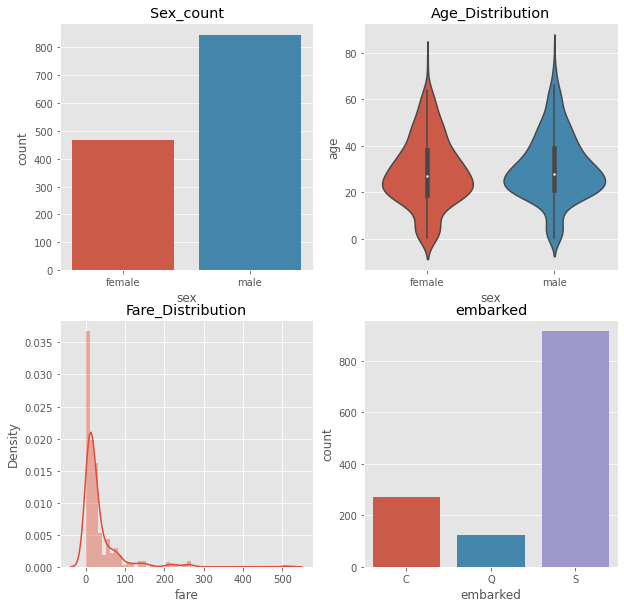

In [90]:
fig, ax= plt.subplots(2,2,figsize=(10,10))
ax1=sns.countplot(X['sex'],ax=ax[0,0])
ax1.set_title('Sex_count')
ax2=sns.violinplot(data=X,x='sex',y='age',ax=ax[0,1])
ax2.set_title('Age_Distribution')
ax3=sns.distplot(X['fare'],ax=ax[1,0])
ax3.set_title('Fare_Distribution')
ax4=sns.countplot(X['embarked'],ax=ax[1,1])
ax4.set_title('embarked')

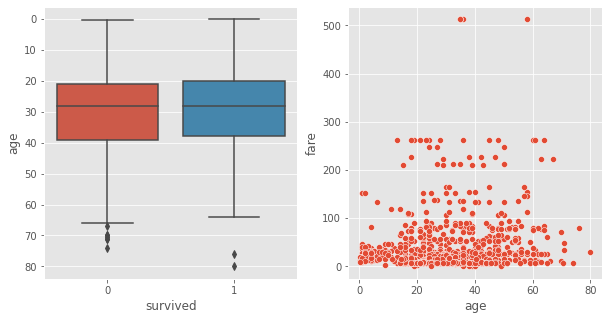

In [91]:
total_df=X.merge(y,left_index=True,right_index=True)

fig,ax=plt.subplots(1,2,figsize=(10,5))
ax1=sns.boxplot(data=total_df,x='survived',y='age',ax=ax[0])
ax1.invert_yaxis()
ax2=sns.scatterplot(data=total_df,x='age',y='fare',ax=ax[1])

In [92]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


## Dealing with NA values

In [93]:
# We can see that there are significant missing values- --> We can either drop the rows with missing data, or replace them , such as 0 or the mean(Does not affect the overall mean)
X.isna().sum(axis=0)

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [94]:
#Fill age with mean
X['age']=X['age'].fillna(X['age'].mean())
X['fare']=X['fare'].fillna(X['fare'].mean())
X['cabin']=X['cabin'].fillna('N')
X['embarked']=X['embarked'].dropna()
X=X.drop(['boat','body','home.dest','name'],axis=1)

In [95]:
y=y.loc[X.index]

In [96]:
X_dummies=pd.get_dummies(X['sex'])
X=X.drop(['sex'],axis='columns').merge(X_dummies,left_index=True,right_index=True)
X_dummies=pd.get_dummies(X['cabin'])
X=X.drop(['cabin'],axis='columns').merge(X_dummies,left_index=True,right_index=True)
X_dummies=pd.get_dummies(X['ticket'])
X=X.drop(['ticket'],axis='columns').merge(X_dummies,left_index=True,right_index=True)
X_dummies=pd.get_dummies(X['embarked'])
X=X.drop(['embarked'],axis='columns').merge(X_dummies,left_index=True,right_index=True)

## Split Train Test data

In [97]:
X.head()

,pclass,age,sibsp,parch,fare,female,male,A10,A11,A14,...,W./C. 14266,W./C. 6607,W./C. 6608,W./C. 6609,W.E.P. 5734,W/C 14208,WE/P 5735,C,Q,S
0,1.0,29.0000,0.0,0.0,211.3375,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,0.9167,1.0,2.0,151.5500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,2.0000,1.0,2.0,151.5500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,30.0000,1.0,2.0,151.5500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,25.0000,1.0,2.0,151.5500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create classes for classifiers
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# Decision Tree
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('Decision Tree Accuracy : {0:4f}'.format(accuracy_score(y_test, dt_pred)))

# Random Forest
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('Random Forest Accuracy : {0:4f}'.format(accuracy_score(y_test, rf_pred)))

# Logistic Regression
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('Logistic Regression Accuracy : {0:4f}'.format(accuracy_score(y_test, lr_pred)))

Decision Tree Accuracy : 0.812977
Random Forest Accuracy : 0.816794
Logistic Regression Accuracy : 0.832061


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
